# Creating dataset

In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std = 0.4)
x_data = torch.Tensor(X) # n_points mesures, 2 inputs par mesure
y_data = torch.Tensor(y.reshape(n_pts,1)) # n_points mesures, 1 output par mesure
x_data.shape, y_data.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

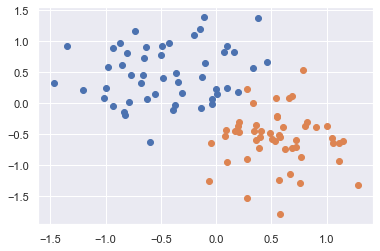

In [5]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

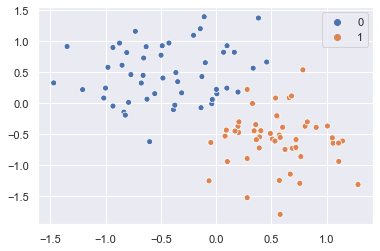

In [6]:
#seaborn version
sns.scatterplot(X[:,0], X[:,1], hue=y)

# Perceptron model

In [7]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x, threshold = 0.5):
        pred = self.forward(x)
        return 1 if pred >= threshold else 0


In [11]:
torch.manual_seed(2)
model = Model(2,1)
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True)
linear.bias Parameter containing:
tensor([0.1939], requires_grad=True)


## tout comme le modèle linéaire, si je ne cherche à prédire qu'un seul exemple, je peux supprimer la première dimension 

In [9]:
def get_params():
    [w,b] = model.parameters()
    w1,w2 = w.view(2)
    return(w1.item(), w2.item(), b[0].item())
def plot_fit(title):
    #la séparation a lieu pour la côte égale à 0. Or l'équation de la droite de séparation est y=w1x1+w2x2+b. En mettant y=0, on peut plotter directement la droite de séparation sur le graphe
   
    w1,w2,b = get_params()
    x1 = np.array([-2.,2])
    x2 = (w1*x1+b)/-w2
    ax = sns.lineplot(x1,x2, color='r')
    ax.set_title(title)
    sns.scatterplot(X[:,0], X[:,1], hue=y)


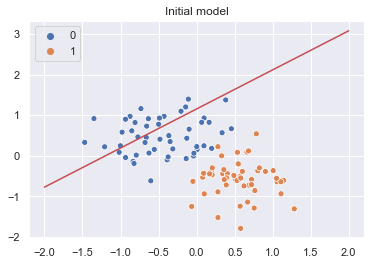

In [10]:
plot_fit("Initial model")

# Model training

In [150]:
torch.manual_seed(2)
model = Model(2,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:", i, "loss:", loss.item())
    # print(model.linear.bias.item(), model.linear.weight.item(), loss)
    
    losses.append(loss)
    optimizer.zero_grad() # we set the grad to zero because gradient accumulate if not
    loss.backward()
    # print(loss,model.linear.bias.item(), model.linear.bias.grad, model.linear.weight.item(), model.linear.weight.grad)
    optimizer.step()

poch: 450 loss: 0.35996463894844055
epoch: 451 loss: 0.35966283082962036
epoch: 452 loss: 0.3593616783618927
epoch: 453 loss: 0.35906124114990234
epoch: 454 loss: 0.35876137018203735
epoch: 455 loss: 0.35846221446990967
epoch: 456 loss: 0.3581636846065521
epoch: 457 loss: 0.3578657805919647
epoch: 458 loss: 0.3575685918331146
epoch: 459 loss: 0.35727202892303467
epoch: 460 loss: 0.3569760024547577
epoch: 461 loss: 0.356680691242218
epoch: 462 loss: 0.3563860356807709
epoch: 463 loss: 0.3560919463634491
epoch: 464 loss: 0.35579854249954224
epoch: 465 loss: 0.35550570487976074
epoch: 466 loss: 0.35521361231803894
epoch: 467 loss: 0.3549220561981201
epoch: 468 loss: 0.3546311557292938
epoch: 469 loss: 0.3543408513069153
epoch: 470 loss: 0.35405123233795166
epoch: 471 loss: 0.3537622392177582
epoch: 472 loss: 0.3534737825393677
epoch: 473 loss: 0.3531860113143921
epoch: 474 loss: 0.3528987169265747
epoch: 475 loss: 0.35261213779449463
epoch: 476 loss: 0.3523261547088623
epoch: 477 loss: 0.

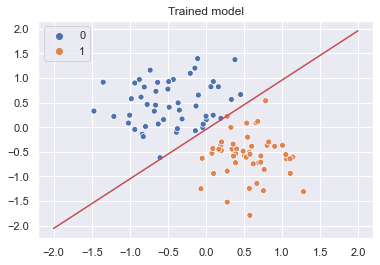

In [151]:
plot_fit("Trained model")

# Model testing

Green point positive probability = 0.9424158334732056 / Predicted class = 1
Black point positive probability = 0.05055497586727142 / Predicted class = 0
Magenta point positive probability = 0.481011301279068 / Predicted class = 0


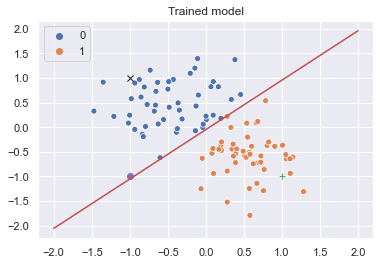

In [155]:
point1 = torch.Tensor([1.0,-1.])
point2 = torch.Tensor([-1.0,1.])
point3 = torch.Tensor([-1.0,-1.])
plt.plot(point1[0], point1[1], "g+")
plt.plot(point2[0], point2[1], "kx")
plt.plot(point3[0], point3[1], "mo")
print("Green point positive probability = {} / Predicted class = {}".format(model.forward(point1).item(), model.predict(point1)))
print("Black point positive probability = {} / Predicted class = {}".format(model.forward(point2).item(), model.predict(point2)))
print("Magenta point positive probability = {} / Predicted class = {}".format(model.forward(point3).item(), model.predict(point3)))
plot_fit("Trained model")